#### Ejemplo de Kalman con sistema Masa-Resorte-Amortiguador

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import control as co
from filterpy.kalman import KalmanFilter 
from filterpy.common import Q_discrete_white_noise
from numpy.linalg import inv

#### Definición de Matrices

In [98]:
A = [[0, 1], [-1, -0.5]]
B = [[0], [10]]
C = [1, 0]
D = 0

#### Creación del sistema de estados

In [99]:
sys = co.ss(A, B, C, D)

#### Respuesta al escalón

In [100]:
t = np.linspace(0,20,1000)

In [101]:
t1, y1 = co.step_response(sys,t)

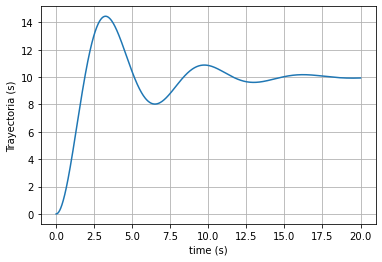

In [102]:
plt.plot(t1,y1)
plt.xlabel('time (s)')
plt.ylabel('Trayectoria (s)')
plt.grid()

### Kalman
Se utiliza un filtro contemple la posición y la velocidad del móvil. Utiliza un sensor para leer la posición.



In [103]:
f = KalmanFilter(dim_x=2, dim_z=1)

Condiciones iniciales sobre la posición y la velocidad

In [104]:
f.x = np.zeros([2, 1000]) #posición = 2m, velocidad 0m/s

In [105]:
f.u = np.ones([1, 1000])

In [106]:
f.A = np.array([[0 ,1],
                [-1, -0.5]]) # F

In [107]:
f.B = np.array([[0 ],
                [10]]) # F

In [108]:
f.C = np.array([[1.,0.]]) # H

In [120]:
f.P = np.array([[1,0.1],
                [0.1, 1] ]) # Matriz de Covarianza, P

In [121]:
f.R = 5 # R

In [122]:
f.Q = np.array([[1.,0.],
                [0., 1.] ]) # Matriz de Covarianza, P

Con estas matrices se procede al loop de predicción/actualización

In [154]:
for i in range (2, len(t)):
     xkp = f.A*f.x[:,i-1] + f.B*f.u[:,i-1]
     Pkp = f.A*f.P*np.transpose(f.A) + f.Q
     K = (Pkp*np.transpose(f.C)) * inv((f.C*Pkp*np.transpose(f.C))+f.R)     #Ganancia de Kalman
     f.x[:,i] = xkp + K*(y1(i) - f.C*xkp)

TypeError: 'numpy.ndarray' object is not callable

In [150]:
xkp

array([[ 0.,  0.],
       [10., 10.]])